# Simple Univariant Linear Regression

The purpose of this notebook is to demostrated the univariant linear regression without using any framework and vectorization.

Linear regression is one of the algorithem used in Supervised Machine Learning. In linear regression, algorithem tried to find the best fit line for given input data. Steps involed in linear regression is

1. Hypothesis - for univariant linear regression algorithem, the hypothesis is
    \begin{equation*}
    h(x) = w * x + b
    \end{equation*}
    where 
        w is weight or slop of the line
        b is bias or y-axis intersect of the line
2. Initialize w and b with some random value
3. Calculate cost for all input data
    \begin{equation*}
    J(w, b) = \frac{1}{m}\sum_{i=1}^m(h(x_i) - y_i)^2
    \end{equation*}
4. Calculate gradient descent using following equations
    \begin{equation*}
    dw = \frac{1}{m}\sum_{i=1}^m(h(x_i)-y_i)*x_i
    \end{equation*}
    \begin{equation*}
    db = \frac{1}{m}\sum_{i=1}^m(h(x_i)-y_i)
    \end{equation*}
5. Update w and b as follows
    \begin{equation*}
    w = w - \alpha * dw
    \end{equation*}
    \begin{equation*}
    b = b - \alpha * db
    \end{equation*}
    where $\alpha$ is a learning rate
6. Iterate steps 2 to 5 depending on number of iterations

In this notebook I am using temperatue conversion as input data and trying to predict w and b. The equation for temperature conversion is
\begin{align}
^\circ F = \frac{9}{5} * ^\circ C + 32
\end{align}

So linear regression algorithm should predict w $\approx$ 1.8 and b $\approx$ 32

Lets start the fun with importing pandas (for reading data from csv file) and matplotlib (for plotting graph) libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Get $^\circ C$ data as input feature and $^\circ F$ data as lable output

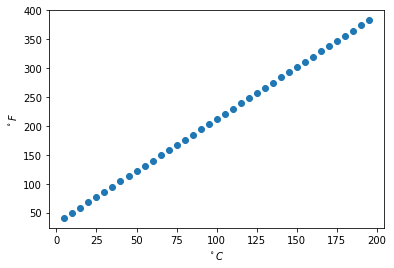

In [2]:
df = pd.read_csv("./data/train.csv")
train_X=df["Celcius"].values
train_Y=df["Ferenhnite"].values
plt.scatter(train_X, train_Y)
plt.xlabel('$^\circ C$')
plt.ylabel('$^\circ F$')
plt.show()

Initialize parameters w and b

In [3]:
def initialize_parameters():
    parameters = {
                    "b" : 0,
                    "w" : 0
                    }
    
    return parameters

Define a function to calculate cost

In [4]:
def calculate_cost(parameters, X, Y):
    b = parameters["b"]
    w = parameters["w"]
    cost = 0
    m = X.shape[0]
    for i in range(0, m):
        cost += ((w * X[i] + b) - Y[i]) ** 2
    return cost / (2 * m)

define a function to calculate gradient descent

In [5]:
def gradient_descent(parameters, X, Y):
    dw = 0
    db = 0
    w = parameters["w"]
    b = parameters["b"]
    m = X.shape[0]
    for i in range(0, m):
        dw += (((w * X[i] + b) - Y[i]) * X[i])
        db += ((w * X[i] + b) - Y[i])
        
    dw /= m
    db /= m
    grads = {
        "dw" : dw,
        "db" : db
    }
    
    return grads

Define a modal function which do the iterations and calculate cost and get gradient descent and update parameters w and b in each iteration

In [6]:
def modal(X, Y, learning_rate=0.001, iterations=100):
    start_time = datetime.now()
    parameters = initialize_parameters()
    costs = []
    for index in range(iterations):
        if index%1000 == 0:
            cost = calculate_cost(parameters, X, Y)
            costs.append(cost)
            print(cost)
        grads = gradient_descent(parameters, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = parameters["w"]
        b = parameters["b"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        parameters = {
            "w" : w,
            "b" : b
        }
    end_time = datetime.now()
    print("Time taken to learn parameters : " + str(end_time - start_time))
    return costs, parameters

In [7]:
costs, parameters = modal(train_X, train_Y, learning_rate=0.00015, iterations=200000)

27602.0
114.4567152658606
106.48963756947799
99.07713045353489
92.18059149184599
85.76410528736119
79.79425643403695
74.2399554980159
69.07227711186964
64.26430933874187
59.79101352191838
55.62909388995884
51.756876238323485
48.15419505570373
44.802288507237684
41.68370072771068
38.78219091590942
36.0826487567159
33.57101573048159
31.234211899880847
29.06006779297012
27.03726102771453
25.155257347940612
23.404255763647296
21.775137509975146
20.259418559030077
18.849205437253758
17.537154118247706
16.316431776976806
15.180681206178564
14.123987709665776
13.140848300114376
12.226143040923631
11.375108382905758
10.58331235695071
9.84663149347267
9.161229348444063
8.523536524183879
7.930232080854408
7.378226241863108
6.8646443031025255
6.386811662232065
5.942239890038759
5.528613771339534
5.143779247937052
4.785732200840014
4.452608013328548
4.142671860510226
3.8543096747997754
3.586019740271047
3.336404872107645
3.1041651404246156
2.8880911005685133
2.6870574946414285
2.5000173914484267
2

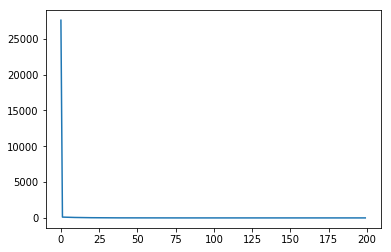

In [8]:
plt.plot(costs)

In [11]:
w = parameters["w"]
b = parameters["b"]

print("w = " + str(w))
print("b = " + str(b))

w = 1.800178681058611
b = 31.976474090330928


As the result shows values of w and b are approx to expected values. Hurray....

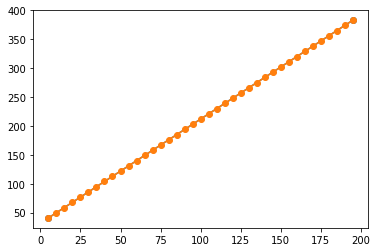

In [15]:
x1, y1 = [5, 195], [w * 5 + b, w * 195 + b]
plt.plot(x1, y1, train_X, train_Y, marker = 'o')
plt.show()

# Future Work
In next notbook we'll try to use matrix to get rid of for loop in cost and gradient function to make our algorithem works fast 